<a href="https://colab.research.google.com/github/Arpit2811/OIBSIP/blob/main/oasis_project_4_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Loading dataset

In [1]:
import pandas as pd
df = pd.read_csv('Twitter_Data.csv')

df.head()


,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


2. basic info about dataset

In [2]:
df.info()
df['category'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


,count
category,
1.0,72250
0.0,55213
-1.0,35510


3. cleaning the data in the dataset

In [3]:

import re
df = pd.read_csv('Twitter_Data.csv')

print(df.columns)

def clean_text(text):

    if not isinstance(text, str):
        return ""

    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"@\w+", "", text)
    text = re.sub(r"#\w+", "", text)
    text = re.sub(r"[^\w\s]", "", text)
    text = text.lower()
    return text


if 'text' in df.columns:
    df['clean_text'] = df['text'].apply(clean_text)
else:
    print("Error: 'text' column not found in the DataFrame. Please check your CSV file and column names.")


df.head()
df.info()
df['category'].value_counts()

Index(['clean_text', 'category'], dtype='object')
Error: 'text' column not found in the DataFrame. Please check your CSV file and column names.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


,count
category,
1.0,72250
0.0,55213
-1.0,35510


4. Text Vectorization

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

if 'clean_text' in df.columns:

    df['clean_text'] = df['clean_text'].fillna('')
    tfidf = TfidfVectorizer(max_features=5000)
    X = tfidf.fit_transform(df['clean_text']).toarray()
    y = df['category']
else:
    print("Error: 'clean_text' column not found in the DataFrame. Please run the cleaning step first.")

5.  Train a Sentiment Classification Model

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report


df.dropna(subset=['category'], inplace=True)


if 'clean_text' in df.columns:

    df['clean_text'] = df['clean_text'].fillna('')
    tfidf = TfidfVectorizer(max_features=5000)
    X = tfidf.fit_transform(df['clean_text']).toarray()
    y = df['category']
else:
    print("Error: 'clean_text' column not found in the DataFrame. Please run the cleaning step first.")


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = MultinomialNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

        -1.0       0.92      0.42      0.58      7230
         0.0       0.88      0.68      0.77     10961
         1.0       0.66      0.95      0.78     14404

    accuracy                           0.74     32595
   macro avg       0.82      0.69      0.71     32595
weighted avg       0.79      0.74      0.73     32595



6. Visualize Sentiment Distribution

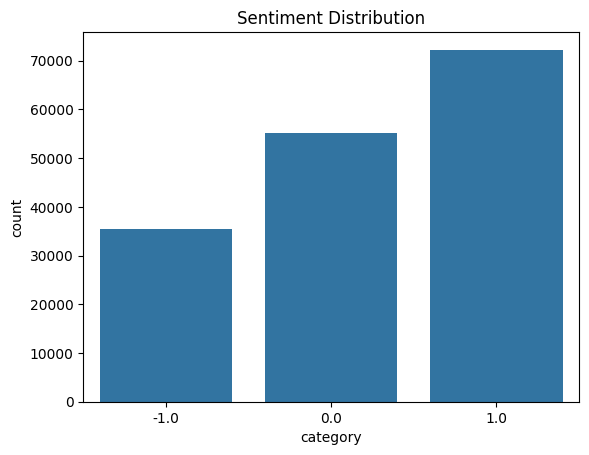

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='category', data=df)
plt.title("Sentiment Distribution")
plt.show()
